---
# <center> **Introduction to Applied Data Science**

### <center> *Prof. Bahram Mobasher*
#### <center> Teaching Assistant: *[Sina Taamoli](https://sinataamoli.github.io/)* | email: *sina.taamoli@email.ucr.edu*
### <center> **Week 9: SVM**
---

## Support Vector Machine (SVM)

SVM is a supervised algorithm which can be used for classification and regression. However, it is originally proposed for binary classification.

Given a dataset ($\vec{\mathbf{x}}$ or $\vec{\mathbf{\phi(x)}}$  ) which are labeled with $y_i \in\{-1,1\}$, we want to find a linear separator with the largest margin between these two types of data. The distance of any point (vector) from a line/plane can be obtained by the projection of that point on the unit normal vector of the line/plane ($\hat{w}$).

$$D_i=\hat{w}.\vec{\mathbf{x_i}}+b$$

So, if $D>0$ then we are in the blue zone of the figure below and if $D<0$ then we are in the red zone. It's our decision rule. The problem is to find optimal $\hat{w}$ and $b$.

To find the optimal seperator line, let's consider a margin between our training sample such that:

$$\vec{w}.x_{blue}+b\geq 1$$
$$\vec{w}.x_{red}+b\leq -1$$

Note that I removed the hat sign from $w$ since it is not a unit vector anymore. We multiplied ($\hat{w}.\vec{\mathbf{x_i}}+b\geq$ arbitrary margin) by (1/arbitrary margin). If you define label such that $y_i=-1$ for reds and $y_i=1$ for blues, then: 

$$y_i(\vec{w}.\vec{\mathbf{x_i}}+b)-1\geq 0$$

It gives us two boundaries: Blue: $\vec{w}.\vec{\mathbf{x_i}}+b=1$ ; Pink: $\vec{w}.\vec{\mathbf{x_i}}+b=-1$

The margin size can be computed using two support vectors, one on blue dashed line and the other on pink dashed line. 

$$\text{Margin}=(\vec{x}_{\text{on blue dashed line}}-\vec{x}_{\text{on pink dashed line}}).\frac{\vec{w}}{||w||}=(1-b-(-1-b))\frac{1}{||w||}=\frac{2}{||w||}$$

To get the optimal seperator we want to maximize the margin. So, we are going to maximize $\frac{2}{||w||}$ or minimize $||w||$. We know that $||w||$ is $\sqrt{\vec{w}.\vec{w}}$. Therefore, we can minimize $\frac{1}{2}||w||^2=\frac{1}{2}\vec{w}.\vec{w}$ which is computationally convenient. 

So, we can solve the following optimization problem:

$$min\ (\frac{1}{2}w^T.w)$$

$$\text{subject to:   } y_i({w}.{\mathbf{x_i}}+b)-1\geq 0 $$

Is that all? Not yet! Imagine we have some outliers (red points in blue region). In the above expression for optimization problem we did not take into account a level of tolerance for those outliers. We can consider this by defining a slack parameter ($\xi$)

$$min\ (\frac{1}{2}w^T.w+C\sum_i \xi_i)$$

$$\text{subject to:   } y_i({w}.{\mathbf{x_i}}+b)\geq 1-\xi_i \text{    and      } \xi_i \geq 0$$ 

To incorporate all the constraints, we can write the following Lagrangian and minimize it:

$$L=\frac{1}{2}w^T.w+C\sum_i \xi_i+\sum_i\alpha_i[1-\xi_i-y_i({w}.{\mathbf{x_i}}+b)]+\sum_i\eta_i(-\xi_i)$$

To minimize the Lagrangian, take the first derivative of the function and put that equal to zero.

$$\frac{\partial L }{\partial w}=w-\sum_i \alpha_i y_i{\mathbf{x_i}}=0 \Rightarrow w=\sum_i \alpha_i y_i{\mathbf{x_i}} $$

$$\frac{\partial L }{\partial b}=\sum_i \alpha_i y_i=0$$

$$\frac{\partial L }{\partial \xi_i}=C-\alpha_i-\eta_i=0$$

Since $\eta_i\geq 1$, it implies that $\alpha_i\leq C$.

Let's substitute $w=\sum_i \alpha_i y_i{\mathbf{x_i}}$ in the Lagrangian equation.

$$L=\sum_{i}\alpha_i-\frac{1}{2}\sum_i\sum_j \alpha_i \alpha_j y_i y_j (\vec{\mathbf{x_i}}.\vec{\mathbf{x_j}}) $$

And the constraints are:

$$(1):\ \sum_i \alpha_i y_i=0$$

$$(2):\ 0 \leq \alpha_i \leq C$$

If we define: $q=(1\ 1\ 1\ ... \ 1)$ and $P_{ij}=y_i y_j (\vec{\mathbf{x_i}}.\vec{\mathbf{x_j}})$, then:

$$max_{\alpha}(q^T\alpha-\frac{1}{2}\alpha^T P\alpha)$$

$$y^T\alpha=0$$

$$0 \leq \alpha_i \leq C$$

So, building an SVM model can be done by solving the above optimization problem.

We will use "cvxopt" package in Python to perform the optimization:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from sklearn.datasets import make_blobs

Let's create a pseudo dataset:

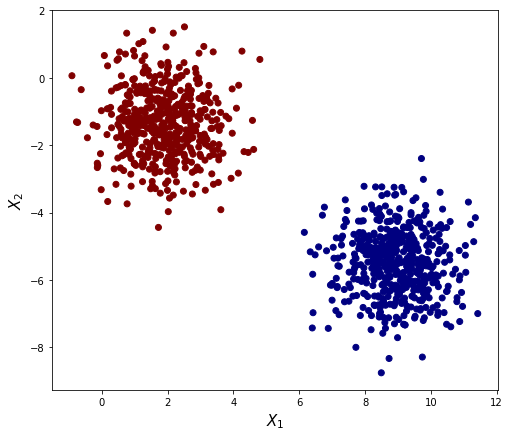

In [32]:
plt.figure(figsize=(8,7))
X,y = make_blobs(n_samples=1000,n_features=2,centers=2,cluster_std=1,random_state=200)
plt.scatter(X[:,0],X[:,1],c=y,cmap='jet')
plt.xlabel('$X_1$',fontsize=15)
plt.ylabel('$X_2$',fontsize=15)
plt.show()

In [33]:
y

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,

Data are labeled with 0 and 1. To be consistent with our notation, we will map 0s to -1.

In [34]:
y[y==0]=-1

In [35]:
help(opt.solvers.qp)

Help on function qp in module cvxopt.coneprog:

qp(P, q, G=None, h=None, A=None, b=None, solver=None, kktsolver=None, initvals=None, **kwargs)
    Solves a quadratic program
    
        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b.
    
    
    Input arguments.
    
        P is a n x n dense or sparse 'd' matrix with the lower triangular
        part of P stored in the lower triangle.  Must be positive
        semidefinite.
    
        q is an n x 1 dense 'd' matrix.
    
        G is an m x n dense or sparse 'd' matrix.
    
        h is an m x 1 dense 'd' matrix.
    
        A is a p x n dense or sparse 'd' matrix.
    
        b is a p x 1 dense 'd' matrix or None.
    
        solver is None or 'mosek'.
    
        The default values for G, h, A and b are empty matrices with
        zero rows.
    
    
    Output arguments (default solver).
    
        Returns a dictionary with keys 'status', 'x', 's', 'y', 'z',
        'primal ob

As you can see from the data above, we can define a seperator line without outliers. So, we will define C as infinite (e.g. $10^{10}$) (hard margin)

Data are labeled with 0 and 1. To be consistent with our notation, we will map 0s to -1.

In [36]:
y[y==0]=-1

In [37]:
help(opt.solvers.qp)

Help on function qp in module cvxopt.coneprog:

qp(P, q, G=None, h=None, A=None, b=None, solver=None, kktsolver=None, initvals=None, **kwargs)
    Solves a quadratic program
    
        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b.
    
    
    Input arguments.
    
        P is a n x n dense or sparse 'd' matrix with the lower triangular
        part of P stored in the lower triangle.  Must be positive
        semidefinite.
    
        q is an n x 1 dense 'd' matrix.
    
        G is an m x n dense or sparse 'd' matrix.
    
        h is an m x 1 dense 'd' matrix.
    
        A is a p x n dense or sparse 'd' matrix.
    
        b is a p x 1 dense 'd' matrix or None.
    
        solver is None or 'mosek'.
    
        The default values for G, h, A and b are empty matrices with
        zero rows.
    
    
    Output arguments (default solver).
    
        Returns a dictionary with keys 'status', 'x', 's', 'y', 'z',
        'primal ob

As you can see from the data above, we can define a seperator line without outliers. So, we will define C as infinite (e.g. $10^{10}$) (hard margin)

In [38]:
C =  10**10

In [39]:
y[0]

1

In [40]:
y = y.reshape(1000, 1)
y[0]

array([1])

In [41]:
y

array([[ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],

In [42]:
y = y.astype('float64')
y[0]

array([1.])

In [43]:
n_train = len(X)
print(n_train)

1000


In [44]:
X

array([[ 1.40016111, -0.68793517],
       [ 2.08221745, -1.46569715],
       [ 9.05481678, -6.35722752],
       ...,
       [ 0.99634611, -0.24123309],
       [ 8.8686196 , -4.78808163],
       [ 8.9583572 , -5.12408295]])

In [45]:
X_ = y * X
X_

array([[ 1.40016111, -0.68793517],
       [ 2.08221745, -1.46569715],
       [-9.05481678,  6.35722752],
       ...,
       [ 0.99634611, -0.24123309],
       [-8.8686196 ,  4.78808163],
       [-8.9583572 ,  5.12408295]])

In [46]:
P_ = np.dot(X_, X_.T)

In [47]:
P_.shape

(1000, 1000)

In [48]:
P_

array([[  2.43370593,   3.92374451, -17.0515627 , ...,   1.5609978 ,
        -15.711386  , -16.06818023],
       [  3.92374451,   6.48389765, -28.17186778, ...,   2.42818391,
        -25.48427209, -26.16360147],
       [-17.0515627 , -28.17186778, 122.4040487 , ..., -10.55530511,
        110.74264986, 113.69124428],
       ...,
       [  1.5609978 ,   2.42818391, -10.55530511, ...,   1.05089897,
         -9.99125836, -10.16172271],
       [-15.711386  , -25.48427209, 110.74264986, ...,  -9.99125836,
        101.57813922, 103.98278966],
       [-16.06818023, -26.16360147, 113.69124428, ..., -10.16172271,
        103.98278966, 106.50838983]])

In [49]:
P = opt.matrix(P_)
b = opt.matrix([0.])
h = opt.matrix(np.hstack(([0.] * n_train, [C] * n_train)))
G = opt.matrix(np.vstack((np.eye(n_train) * -1, np.eye(n_train))))
q = opt.matrix([-1.] * n_train)
A = opt.matrix(y.T)

In [50]:
sol = opt.solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  2.6702e+18 -3.5976e+22  9e+22  5e-01  2e-03
 1:  5.4273e+18 -3.8382e+21  6e+21  2e-02  3e+02
 2:  5.8166e+18 -1.5206e+20  2e+20  7e-04  1e+01
 3:  3.4546e+18 -4.9291e+18  9e+18  7e-06  1e-01
 4:  5.2821e+17 -5.6838e+17  1e+18  1e-08  8e-06
 5:  7.5724e+16 -8.3387e+16  2e+17  3e-08  4e-06
 6:  1.0851e+16 -1.1923e+16  2e+16  2e-08  1e-06
 7:  1.5549e+15 -1.7088e+15  3e+15  5e-10  5e-07
 8:  2.2281e+14 -2.4487e+14  5e+14  2e-09  2e-07
 9:  3.1928e+13 -3.5089e+13  7e+13  4e-10  7e-08
10:  4.5752e+12 -5.0281e+12  1e+13  2e-10  3e-08
11:  6.5561e+11 -7.2052e+11  1e+12  9e-12  1e-08
12:  9.3948e+10 -1.0325e+11  2e+11  1e-11  4e-09
13:  1.3462e+10 -1.4795e+10  3e+10  3e-11  1e-09
14:  1.9291e+09 -2.1201e+09  4e+09  4e-12  5e-10
15:  2.7644e+08 -3.0381e+08  6e+08  1e-12  2e-10
16:  3.9612e+07 -4.3536e+07  8e+07  3e-13  8e-11
17:  5.6760e+06 -6.2389e+06  1e+07  2e-13  3e-11
18:  8.1324e+05 -8.9414e+05  2e+06  8e-15  1e-11
19:  1.1649e+05 -1.28

In [51]:
alpha =  np.array(sol['x'])
print(alpha[:10])

[[2.93450384e-11]
 [3.98934998e-11]
 [2.95256562e-11]
 [1.05773687e-10]
 [4.76680884e-11]
 [3.94055472e-11]
 [2.35817066e-11]
 [2.64523266e-11]
 [3.07636932e-11]
 [2.58830238e-11]]


In [53]:
w = np.sum((alpha * y) * X, axis = 0)
print(w)

[-0.68669636  0.38315689]


In [54]:
X_r = X[(y == 1)[:, 0]]
X_r

array([[ 1.40016111, -0.68793517],
       [ 2.08221745, -1.46569715],
       [ 3.96237286, -1.64735858],
       [ 2.24667727, -1.12096937],
       [ 0.2021356 , -0.92455808],
       [ 0.83457079, -1.20588544],
       [ 2.13831021, -0.51785484],
       [-0.12371087, -2.602888  ],
       [ 0.98819034, -0.02954265],
       [ 3.01954253, -1.06142053],
       [ 1.58586757, -1.85658191],
       [ 2.15575147, -1.26869429],
       [ 1.70519159, -2.04593091],
       [ 2.57233645, -1.11750115],
       [ 1.77093576,  0.08232611],
       [ 2.8792037 , -1.4193812 ],
       [ 2.49638663,  0.44469264],
       [ 0.07554993,  0.65709144],
       [ 1.60081237, -0.37366095],
       [ 1.94795784, -2.55084316],
       [ 1.01015685, -1.12023803],
       [ 3.09881715, -0.70301428],
       [ 1.58985166, -1.43473793],
       [-0.90918701,  0.05806194],
       [ 2.52786816, -1.27642346],
       [ 2.01830606, -3.97432181],
       [ 2.51977925, -2.50495958],
       [ 2.44447286, -1.82904678],
       [ 1.48210327,

In [55]:
1-np.dot(X_r, w)

array([2.22507264, 2.9914431 , 4.3521438 , 2.97229224, 1.49305657,
       2.03514003, 2.66678949, 1.91236266, 1.68990618, 3.48019945,
       2.80037163, 2.96645564, 2.95486138, 3.19459234, 2.18455133,
       3.52098438, 2.54387256, 0.80011075, 2.24244279, 3.31502868,
       2.12289794, 3.39731122, 2.64147507, 0.35341776, 3.2249483 ,
       3.9087522 , 3.69011575, 3.37942249, 2.2761711 , 2.41319186,
       2.65782785, 2.66376696, 2.23416632, 3.8757304 , 4.02675411,
       2.46462798, 2.90271799, 4.93238343, 3.39884879, 3.01270203,
       3.26169028, 3.96129889, 4.04979811, 3.00227668, 2.13541029,
       3.03231953, 2.52976646, 3.34608871, 3.5190613 , 2.63657136,
       2.19794982, 3.78721957, 1.88412795, 2.712615  , 1.98998648,
       3.81046014, 2.92833193, 3.26824898, 2.16419374, 1.22313638,
       3.02401576, 4.20197749, 3.05635901, 3.17077992, 1.35623626,
       0.97375948, 2.52935265, 3.54160126, 3.44558351, 2.22744007,
       3.03803665, 2.57852353, 2.39578104, 1.90810006, 3.02399

In [56]:
b = np.max(1-np.dot(X_r, w))
print(b)

4.983377686567158


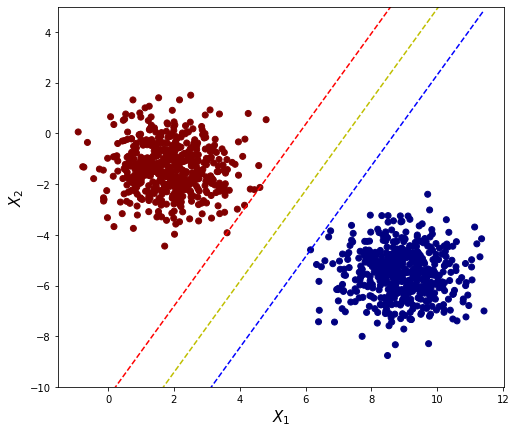

In [57]:
plt.figure(figsize = (8, 7))
plt.scatter(X[:, 0], X[:, 1], c = y[:, 0], cmap = 'jet')
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)

x1_ = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))

plt.plot(x1_, (-w[0] * x1_ - (b-1))/ w[1], 'r--')
plt.plot(x1_, (-w[0] * x1_ - (b+1))/ w[1], 'b--')
plt.plot(x1_, (-w[0] * x1_ - (b))/ w[1], 'y--')

plt.ylim(-10, 5)

plt.show()